In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["savefig.dpi"] = 400

In [62]:
class Particula:
    def __init__(self, x, y, v, b, m, g, theta):
        self.x = x
        self.y = y
        self.v = np.linalg.norm(v)
        self.b = b
        self.m = m
        self.g = g
        self.t = theta
        self.theta = theta * np.pi/180
    
    def trajetoria(self):
        ic = [self.x, self.y, self.v * np.cos(self.theta), self.v * np.sin(self.theta)]
        args = (self.b, self.m, self.g)
        def ed(t, ic, b, m, g):
            x, y, vx, vy = ic
            dvxdt = -b*np.sqrt(vx**2 + vy**2)*vx / m
            dvydt = (-b*np.sqrt(vx**2 + vy**2)*vy / m) - g
            return vx, vy, dvxdt, dvydt
        solucao = solve_ivp(ed, [0, 4], y0 = ic, t_eval = np.linspace(0, 4, 1000), args = args, method='RK45')
        return solucao
        
    def plot(self):
        x, y = self.traje_filter()
        plt.plot(x, y)
        plt.show()
        
    def traje_filter(self):
        data = self.trajetoria()
        mask_pos = data.y[1] >= 0
        x = data.y[0][mask_pos]
        y = data.y[1][mask_pos]
        return x, y      

In [63]:
p1 = Particula(0, 0, 30, 1, 5, 9.8, 40)
p2 = Particula(0, 0, 30, 1, 5, 9.8, 45)
p3 = Particula(0, 0, 30, 1, 5, 9.8, 50)

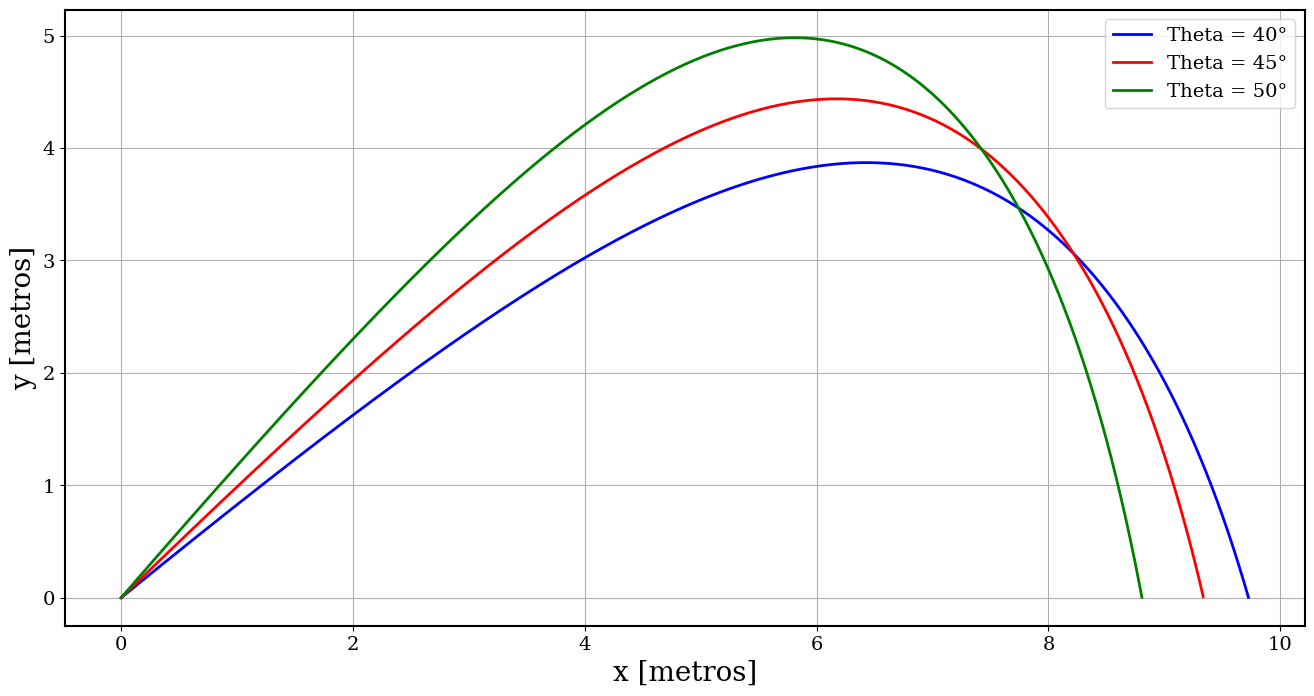

In [64]:
plt.plot(p1.traje_filter()[0], p1.traje_filter()[1], label = f"Theta = {p1.t}°", color = "blue")
plt.plot(p2.traje_filter()[0], p2.traje_filter()[1], label = f"Theta = {p2.t}°", color = "red")
plt.plot(p3.traje_filter()[0], p3.traje_filter()[1], label = f"Theta = {p3.t}°", color = "green")
plt.xlabel("x [metros]")
plt.ylabel("y [metros]")
plt.grid()
plt.legend()
plt.show()